<h1>Analysis of New Fixed Deposit Account Holders</h1>

<h2>#0: Preparations</h2>

<h3>#0_1: Importing Libraries</h3>

In [47]:
### Import necessary libraries
import glob                     # Library for loading data
import numpy as np              # Library for handling arrays
import pandas as pd             # Library for data preprocessing
import matplotlib.pyplot as plt # Library for graph visualization
import seaborn as sns           # Library for graph visualization

### Libraries for model training and evaluation
from sklearn.preprocessing import StandardScaler # Class for standardizing numerical data
from sklearn.preprocessing import MinMaxScaler # Class for normalizing numerical data
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Classes for decision tree algorithm and visualization
from sklearn.model_selection import train_test_split # Function for splitting training and test data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc # Functions for evaluating decision tree models

<h3>#0_2: Display Settings</h3>

In [48]:
### Set the number of decimal places for display
np.set_printoptions(precision=3)
pd.options.display.precision = 3

### Set pandas to display all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<h3>#0_3: Data Import</h3>

<p># 0_3_1: Convert Your Excel File to CSV</p>
<li>Open the Excel sheet you want to analyze from within the Excel workbook.</li>
<li>Click on "File" in the top-left corner and select "Save As."</li>
<li>Name the file "bank_analy" and select "CSV" from the dropdown menu.</li>
<li>Select "This PC" from the "Other locations" section and save it to the desktop.</li>
<p># 0_3_2: Select Folder > content > drive > MyDrive and store your file</p>

In [49]:
### Code for Reading in Google Colab ###

In [50]:
# Code for connecting files in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

<p># 0_3_3: After executing the above, select Folder > content > drive > MyDrive, click the three-dot menu, and copy the path.</p>

In [51]:
# Specify the file path for the data to be imported (default file is bank_default.csv)
# file_path = '/content/drive/MyDrive/python_code/bank_analy.csv'

<p># 0_3_4: To work with Pandas, load the table data into a Pandas DataFrame.</p>


```
# Use the Pandas library to read table data
df = pd.read_csv(file_path)

```



In [52]:
# df = pd.read('/content/drive/MyDrive/python_code/bank.csv')

In [54]:
### ローカル用読み取りコード ###

In [55]:
def get_analy_data(file_name="*bank*.xlsx"):
    """
    Get analysis data (may need to be modified for Google Colab distribution)
    Args:
        file_name: Name of the file for analysis
    Return: 
        df: DataFrame of the analysis file
    """
    files = glob.glob(file_name)
    df = pd.read_excel(files[0]) # Get the original data
    return df


In [56]:
df = get_analy_data(file_name="*bank*.xlsx")

<h2>#1: Data Inspection</h2>

<h3>#1_1: Display Basic Information of the Data</h3>

<p>Check various information about the table data.</p>
<p>Review the information to consider necessary processing or analysis.</p>



```
df.info()
```

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

<p>For example, the following information can be confirmed in the current data:</p>
<p>-------------------</p>
<p>Total number of rows: 4119</p>
<p>Total number of columns: 21</p>

<ul>
    <li>age: 4119 rows, 0 missing values, data type int64</li>
    <li>y: 4119 rows, 0 missing values, data type object</li>
    <p>........</p>
</ul>

<h3>#1_2: Display Data Sample</h3>

<p>Display the top n rows of data to review an overview of the data.</p>


```
# Specify the number of rows to display with n (defaults to the top 5 rows if empty)

df.head(n)
```



In [58]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,451.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,3668.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,NaN
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,NaN
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,NaN
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,NaN
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,NaN
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,NaN
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,NaN
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,NaN


<p>The content of each item is as follows:</p>
<ul>
    <li>Feature Name: Description of the feature</li>
</ul>

<h3>#1_3: Display Data Statistics</h3>

<p>Check the statistics of the numerical data.</p>
<p>Review the composition of each column to consider necessary processing.</p>



```
df.describe()
```



In [59]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Unnamed: 21
count,4119.000,4119.000,4119.000,4119.000,4119.000,4119.000,4119.000,4119.000,4119.000,4119.000,2.000
mean,40.114,256.788,2.537,960.422,0.190,0.085,93.580,-40.499,3.621,5166.482,2059.500
std,10.313,254.704,2.568,191.923,0.542,1.563,0.579,4.595,1.734,73.668,2274.763
min,18.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.635,4963.600,451.000
25%,32.000,103.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.334,5099.100,1255.250
50%,38.000,181.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,5191.000,2059.500
75%,47.000,317.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,5228.100,2863.750
max,88.000,3643.000,35.000,999.000,6.000,1.400,94.767,-26.900,5.045,5228.100,3668.000


<p>The statistics for each item are as follows (calculated excluding all NaN values):</p>
<ul>
    <li>count: Number of data points in the column</li>
    <li>mean: Mean value of the column</li>
    <li>std: Standard deviation of the column</li>
    <li>min: Minimum value of the column</li>
    <li>25%: First quartile of the column</li>
    <li>50%: Second quartile (median) of the column</li>
    <li>75%: Third quartile of the column</li>
    <li>max: Maximum value of the column</li>
</ul>

<h2>#2: Data Visualization</h2>

In [60]:
# Function to display a histogram
def ViewHistogram(df, column, category_column, category_values, colors, alpha=0.5, xlabel="age", ylabel="number of yes and no", figsize=(12, 6)):
    """
    Displays a histogram based on the specified DataFrame.

    Args:
        df: The DataFrame used to create the histogram.
        column: The name of the column to be plotted in the histogram.
        category_column: The name of the column used to split the data by category.
        category_values: A list of values for each category.
        colors: A list of colors for each category's histogram.
        alpha: The transparency of the histogram. Default is 0.5.
        xlabel: Label for the x-axis. Default is "age".
        ylabel: Label for the y-axis. Default is "number of yes and no".
        figsize: Size of the figure (width, height). Default is (12, 6).
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)  # Set the size of the figure (default is 12 inches wide and 6 inches high)
    
    # Plot histogram for each category by splitting the data
    for value, color in zip(category_values, colors):
        subset = df[df[category_column] == value]  # Extract rows for the specified category
        subset[column].hist(color=color, alpha=alpha, label=value)  # Plot histogram
    
    plt.xlabel(xlabel)  # Set the label for the x-axis
    plt.ylabel(ylabel)  # Set the label for the y-axis
    plt.legend()  # Display the legend
    plt.show()  # Show the graph


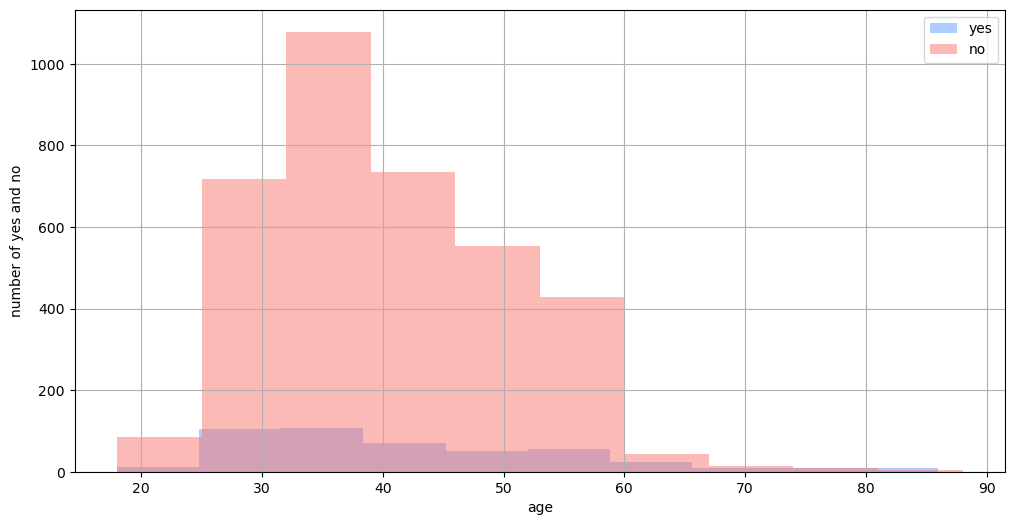

In [61]:
# Draw histogram
ViewHistogram(
    df = df,  # Specify the DataFrame
    column = "age",  # Specify the x-axis of the histogram
    category_column = "y",  # Specify the column for the y-axis data
    category_values = ["yes", "no"],  # Specify the groups for the histogram
    colors = ["#5F9BFF", "#F8766D"]  # Blue for "yes", pink for "no"
)


<h2>#3 : Data Preprocessing</h2>


<h2>#3 : Data Preprocessing</h2>


<p>Remove data (columns) that are not used for analysis.</p>
<p>You can specify column names to be removed in a list, allowing you to delete multiple columns simultaneously.</p>




```
# Use df.drop() to remove specified columns or rows
# axis: Specify the direction of operation (1 for column deletion, 0 for row deletion)

df.drop(list_of_columns_to_remove, axis=1).reset_index(drop=True)
```


In [62]:
drop_columns = ['duration']
df = df.drop(drop_columns, axis=1).reset_index(drop=True)

In [63]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,451.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,3668.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,NaN
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,NaN
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,NaN
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,NaN
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,NaN
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,NaN
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,NaN
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,NaN


<h3>#3_2 : Removing Rows with Missing Values</h3>

<p>If there are missing values in the data, some form of handling may be necessary.</p>
<p>Possible approaches include:</p>
<ul>
  <li>Deleting rows with missing values <-- This approach</li>
  <li>Deleting columns with missing values</li>
  <li>Imputing missing values with specific values (e.g., mean or recent values)</li>
  <li>Handling missing values as Null data without modification</li>
</ul>


```
# You can delete all rows (or columns) by setting the column (or row) names list to empty.
# how: Specifies the condition for deleting rows or columns (use 'any' to delete if any value is missing, 'all' to delete only if all values are missing).
# axis: Specifies the direction of the operation (1 for column deletion, 0 for row deletion).

df.dropna(subset=columns_name_list, how='any', axis=0).reset_index(drop=True)

```


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

<h3>#3_3: Generating New Features (Categorizing Numerical Data)</h3>

<p>Split numerical data into categories and convert it into categorical variables.</p>
<p>Divide the range of data from the minimum to the maximum into n intervals and return the corresponding category.</p>


```
# Specify the number of intervals as an integer
pd.cut(df[列名], bins=分割数, labels=False)
```

In [65]:
# Create a categorical feature by dividing age into 4 intervals
df['ageband'] = pd.cut(df['age'], 4, labels=False).astype('str')

In [66]:
# Create a new categorical feature by dividing 'emp.var.rate' into 4 intervals
# df['emp.var.rateband'] = pd.cut(df['emp.var.rate'], 4, labels=False).astype('str')

In [67]:
df[['age', 'ageband']].head(10)

,age,ageband
0,30,0
1,39,1
2,25,0
3,38,1
4,47,1
5,32,0
6,32,0
7,41,1
8,31,0
9,35,0


<h3>#3_4 : Generation of New Features (Combination of Multiple Columns)</h3>

<p>It is possible to generate new features by combining multiple columns.</p>

In [68]:
# [Practical] Let's Try Creating a New Column (Optional)

In [69]:
# Numeric Variable + Categorical Variable
# df['age_marital'] = df['age'].astype(str) + '_' + df['marital']

<h3>#3_5 : Generation of New Features (Categorization of Numeric Data using Ternary Operator)</h3>

<p>Use the apply function and lambda functions to perform specific operations on each row.</p>

```
# By specifying r[<column_name>] within the conditional expression, you can perform operations using row-specific values for a particular column
# axis: Specify the direction of operation (1 for row operations, 0 for column operations)
df.apply(lambda r: value_if_condition_is_true if condition else value_if_condition_is_false, axis=1)
```

In [70]:
# [Practical] Let's Try Creating a New Column (Optional)

In [71]:
# Rewrite 1: Classify the number of contacts during the campaign into 2 types: 0 and 1 or more
df['campaign'] = df.apply(lambda r: 1 if r['campaign'] > 0 else 0, axis=1)

In [72]:
# Rewrite Example 2: Classify 'job' into 2 types
# nonsalary_jobs = ['admin.', 'entrepreneur', 'self-employed', 'student', 'retired', 'housemaid', 'unemployed', 'unknown']
# df['job'] = np.where(df['job'].isin(nonsalary_jobs), 'job_nonsalary', 'job_salary')

<h3>#3_6 : One-Hot Encoding of Categorical Variables</h3>

<p>Categorical variables need to be transformed into a format that can be read by machines.</p>

```
# By passing the dataframe as a parameter, you can convert all at once
# Specify the data type to convert from dtype
pd.get_dummies(df[<list_of_column_names>], dtype=int)
```

In [73]:
# Convert the following columns to categorical variables (either add new columns or remove unused columns)
# [Practical] Add the column names you created yourself
category_columns = [#'job', 
                    #'marital', 
                    #'education', 
                    #'default', 
                     #'loan', 
                     #'contact', 
                     #'month', 
                     #'day_of_week', 
                     #'poutcome', 
                     'ageband', 
                     'campaign'
                     ]


In [74]:
# Convert to one-hot encoding
df_category = pd.get_dummies(df[category_columns], dtype=int)

In [75]:
df_category.head()

,campaign,ageband_0,ageband_1,ageband_2,ageband_3
0,1,1,0,0,0
1,1,0,1,0,0
2,1,1,0,0,0
3,1,0,1,0,0
4,1,0,1,0,0


<h3>#3_7 : Extraction of Numeric Data</h3>

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'Unnamed: 21', 'ageband'],
      dtype='object')

In [77]:
# Standardize the following columns (either add new columns or remove unused columns)
# [Practical] Add the column names you created yourself
num_columns = [#'pdays', 
               #'previous',
               #'emp.var.rate', 
               'cons.price.idx', 
               #'cons.conf.idx', 
               'euribor3m', 
               'nr.employed'
               ]

In [78]:
# Convert the dataframe to include only the columns specified in df['num_columns']
df_ss = df[num_columns]

<h3>#3_8 : Data Merging</h3>

<p>Perform horizontal concatenation of multiple dataframes.</p>

```
# Use axis=1 for horizontal concatenation, and axis=0 for vertical concatenation
pd.concat(list_of_dataframes, axis=1)
```

In [79]:
# Merge the created numeric data and the one-hot encoded data
df_ml = pd.concat([df_ss, df_category], axis=1)

In [80]:
df_ml.head(10)

,cons.price.idx,euribor3m,nr.employed,campaign,ageband_0,ageband_1,ageband_2,ageband_3
0,92.893,1.313,5099.1,1,1,0,0,0
1,93.994,4.855,5191.0,1,0,1,0,0
2,94.465,4.962,5228.1,1,1,0,0,0
3,94.465,4.959,5228.1,1,0,1,0,0
4,93.200,4.191,5195.8,1,0,1,0,0
5,94.199,0.884,4963.6,1,1,0,0,0
6,94.199,0.879,4963.6,1,1,0,0,0
7,93.200,4.191,5195.8,1,0,1,0,0
8,93.200,4.153,5195.8,1,1,0,0,0
9,93.994,4.855,5191.0,1,1,0,0,0


<h3>#3_9 : Splitting Training and Test Data</h3>

<p>Split the dataset into training and test data to create an analysis model.</p>

```
# test_size: Define the ratio for splitting the dataset into training and test sets
# random_state: Random seed value (Setting a seed ensures that the function's execution results are consistent, maintaining reproducibility in analysis)
X_train, X_test, y_train, y_test = train_test_split(features_dataset, target_dataset, test_size=a_decimal_value_between_0_and_1, random_state=any_constant)

```

In [81]:
# List of columns used for current analysis
use_cols = df_ml.columns
print(use_cols)

Index(['cons.price.idx', 'euribor3m', 'nr.employed', 'campaign', 'ageband_0',
       'ageband_1', 'ageband_2', 'ageband_3'],
      dtype='object')


In [82]:
# [Practical] If there are unnecessary columns, remove them
# df_mn.drop(['unnecessary_column_name1', 'unnecessary_column_name2',...], axis=1)

In [83]:
X = df_ml[use_cols]  # Data used as features <-- Use data specified by use_cols
y = df['y'].map({'yes': 1, 'no': 0})  # Data used as target <-- Predict whether a new account was opened. 'yes' is mapped to 1 and 'no' to 0

In [84]:
# test_size: Use 30% of the data for the test dataset and the remaining 70% for the training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

<h2>#4 : Model Creation</h2>

<h3>Decision Tree Model</h3>

In [85]:
# To create a decision tree model, copy and use the following method
def MakeTreeModel(X_train, y_train, depth, figsize=(12,6)):
  """ 
    Create a Decision Tree Model

    Args: 
      X_train: Features for training
      y_train: Target variable for training
      depth: Depth of the decision tree (default is 2)
      figsize: Size of the image for visualizing the decision tree
      
    Return:
      Trained decision tree model
  """
  # Initialize the decision tree model (create an instance)
  # random_state: Random seed value (Setting a seed ensures that the function's execution results are consistent, maintaining reproducibility in analysis)
  # max_depth: Defines the number of splitting levels in the decision tree. For example, max_depth = 2 will result in 2 levels
  tree_model = DecisionTreeClassifier(random_state=99, max_depth=depth)

  # Train the model
  tree_model.fit(X_train, y_train)

  print(pd.Series(tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False))

  # Visualize the decision tree algorithm
  plt.figure(figsize=figsize)
  class_names_map = {0: 'no', 1: 'yes'}
  class_names_str = [class_names_map[cls] for cls in sorted(np.unique(y_train))]
  ax = plot_tree(tree_model, max_depth=depth, feature_names=X_train.columns, class_names=class_names_str, filled=True)
  plt.show()

  return tree_model


<h3>Executing Model Creation</h3>

nr.employed       0.732
euribor3m         0.156
cons.price.idx    0.083
ageband_1         0.015
ageband_3         0.014
campaign          0.000
ageband_0         0.000
ageband_2         0.000
dtype: float64


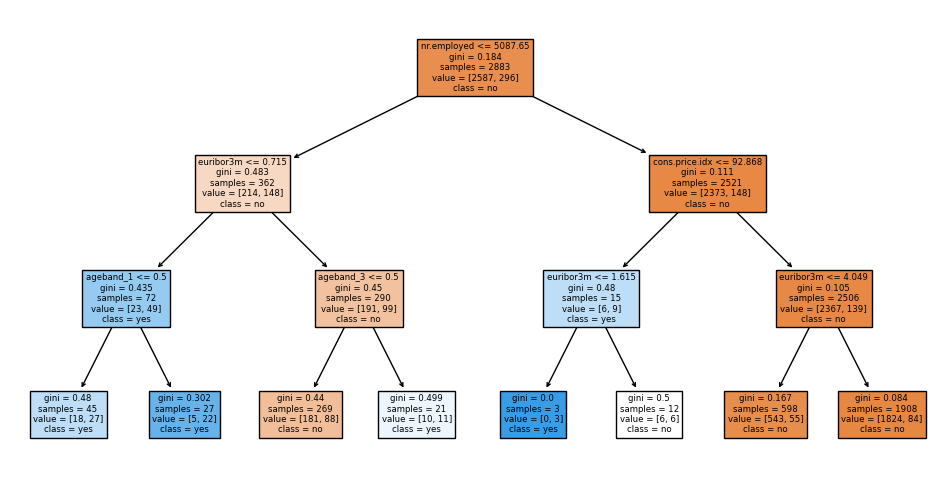

In [86]:
# Depth of the decision tree
model_depth = 3

# Threshold for prediction probabilities (between 0 and 1; extremely high or low values will cause errors)
# [Practical] Try changing the threshold
threshold = 0.5

tree_model = MakeTreeModel(X_train, y_train, model_depth)

# decision_tree_model.predict( test_data ) : Predict data using the created model
y_pred_tree = tree_model.predict_proba(X_test)[:, 1]

# Apply threshold to the prediction results
y_pred_prob_threshold = (y_pred_tree >= threshold).astype(int)

<h2>#5 : Model Evaluation</h2>

<h3>#5-1: Confusion Matrix</h3>

<p>Models need to be evaluated using multiple metrics beyond just accuracy to determine their usefulness.</p>
<ul>
  <li>Accuracy: The ratio of correctly predicted data among the total data when predicting "Positive or Negative."</li>
  <li>Recall: The ratio of correctly predicted Positive cases out of all actual Positive cases (TP/(TP+FN)).</li>
  <li>Precision: The ratio of correctly predicted Positive cases out of all cases predicted as Positive (TP/(TP+FP)).</li>
  <li>F1 Score: A metric that takes the harmonic mean of Precision and Recall.</li>
</ul>

<p>Create a dataframe containing only numeric data.</p>

![alt text](Typical-structure-of-confusion-matrix-1.png)

In [87]:
# To evaluate the model, copy and use the following method
def Evaluation(y_test, y_pred):
    """ 
    Calculate evaluation metrics derived from the confusion matrix
    Args:
        y_test: Test data
        y_pred: Predicted data
    """

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate recall
    recall = recall_score(y_test, y_pred, pos_label=1)
    # Calculate precision
    precision = precision_score(y_test, y_pred, pos_label=1)
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Output results (using formatted strings to display results rounded to three decimal places)
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'F1 Score: {f1:.3f}')
    print('----------')

    # Confusion matrix
    # Using the labels argument to show the count of true positives (TP) and true negatives (TN)
    cf_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print('Confusion Matrix')
    print(cf_mat)


In [88]:
# Evaluate the decision tree model
Evaluation(y_test, y_pred_prob_threshold)

正解率: 0.871
再現率: 0.135
適合率: 0.447
F1スコア: 0.208
----------
混同行列
[[  21  134]
 [  26 1055]]


<h3>Reference #5-2: Probability Distribution</h3>

<p>By examining the probability distribution, you can evaluate the model.</p>
<ul>
  <li>Calculate the probability that each test data point belongs to class 1, with the horizontal axis representing the calculated probabilities and the vertical axis representing the probability density.</li>
  <li>The blue graph represents the group where the actual class is 0, and the red graph represents the group where the actual class is 1.</li>
</ul>

In [89]:
def Evaluation_Prediction_of_distribution(y_pred_prob_threshold, threshold):
    """
    Plot the distribution of predicted probabilities for each class using test data and the model

    Args: 
        y_pred_prob_threshold: Probabilities predicted by the model
        threshold: Threshold value
    """
    # Extract probabilities where the actual class is 0
    prob_class_0 = y_pred_prob_threshold[y_test == 0]
    
    # Extract probabilities where the actual class is 1
    prob_class_1 = y_pred_prob_threshold[y_test == 1]

    # Calculate the area under the curve
    kde_class_0 = sns.kdeplot(prob_class_0)
    kde_class_1 = sns.kdeplot(prob_class_1)
    
    # Retrieve KDE data
    kde_data_class_0 = kde_class_0.get_lines()[0].get_data()
    kde_data_class_1 = kde_class_1.get_lines()[0].get_data()
    
    # Calculate the area
    area_class_0 = np.trapz(kde_data_class_0[1], kde_data_class_0[0])
    area_class_1 = np.trapz(kde_data_class_1[1], kde_data_class_1[0])
    plt.clf()

    # Display the results (each area should be less than or equal to 1)
    print(f'Total probability for the group actually belonging to Class 0: {area_class_0:.2f}')
    print(f'Total probability for the group actually belonging to Class 1: {area_class_1:.2f}')
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(prob_class_0, label='Class 0', color='blue', fill=True)
    sns.kdeplot(prob_class_1, label='Class 1', color='red', fill=True)
    plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold at {threshold}')
    plt.title('Predicted Probability in Class 1')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


実際にClass 0であるグループの確率の合計: 1.00
実際にClass 1であるグループの確率の合計: 1.00


<Figure size 640x480 with 0 Axes>

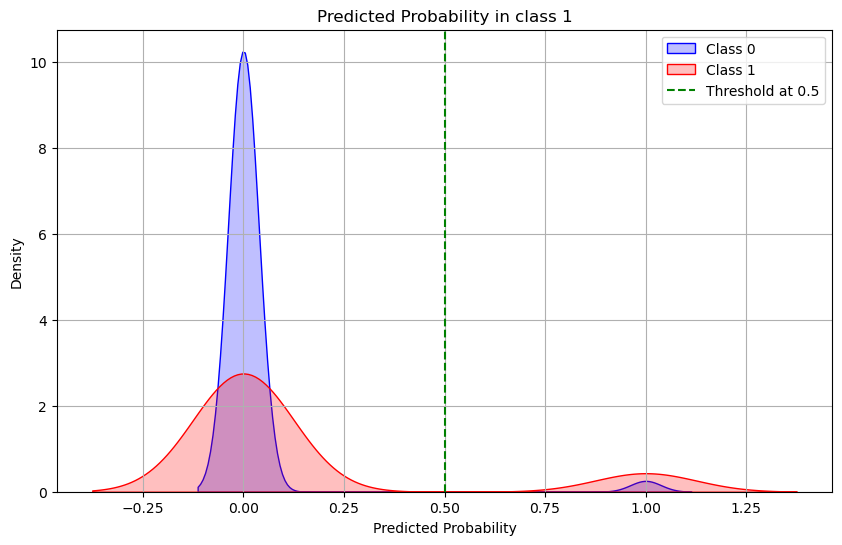

In [90]:
# 閾値を変更したverを確認したい場合は、モデル作成時点の閾値を変更して、モデル作成の実行の部分から回しなおす必要があります
Evaluation_Prediction_of_distribution(y_pred_prob_threshold, threshold)

<h3>Reference #5-3: ROC Curve and AUC</h3>

<p>There are evaluation metrics for models such as the ROC curve and AUC.</p>
<ul>
  <li>ROC Curve: The ROC curve, also known as the Receiver Operating Characteristic curve, plots the True Positive Rate (TPR) on the vertical axis and the False Positive Rate (FPR) on the horizontal axis.</li>
  <li>AUC: AUC stands for the Area Under the Curve. A larger AUC value (0.5 <= AUC <= 1) indicates better model performance.</li>
  <li>For each predicted probability, the recall and precision are calculated using different thresholds, and the results are plotted.</li>
</ul>


In [91]:
# def Evaluation_ROC_AUC(y_test, y_pred_prob):
#     """ 
#     Calculate evaluation metrics derived from the confusion matrix
#     Args:
#         y_test: Test data
#         y_pred_prob: Predicted data (probabilities)
#     """
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # Calculate using each predicted probability as the threshold

#     # Calculate AUC
#     roc_auc = auc(fpr, tpr)
#     print('AUC:', roc_auc)

#     # Plot ROC curve
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC)')
#     plt.legend(loc="lower right")
#     plt.show()

In [92]:
# Evaluation_ROC_AUC(y_test, y_pred_tree)